In [22]:
%matplotlib inline
from plots import *
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
#import seaborn as sns
plt.style.use("bmh")

redish = '#EE7733'
blueish = '#0077BB'
greenish = '#009988'

plt.rc('legend', frameon=False)
plt.rc('figure', dpi=120)
plt.rc('savefig', dpi=300)
plt.rc('font', size=8)

column_width = 3.3
page_width = 6.7

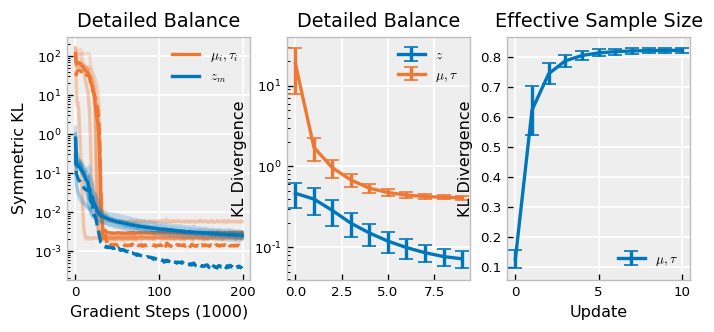

In [23]:
fig = plt.figure(figsize=(page_width, 0.4 * page_width))

kl_eta = []
kl_z = []
for i in range(10):
    PATH = 'neurips/ag-10runs/log/log-ag-10runs-%dround.txt' % i
    df = pd.read_csv(PATH, sep=',  ', engine='python')
    kl_eta.append((df["KL_eta_ex"].values + df["KL_eta_in"].values) / 6)
    kl_z.append((df["KL_z_ex"].values + df["KL_z_in"].values) / 60)
kl_eta_mean = np.vstack(kl_eta).mean(0)
kl_eta_std = np.vstack(kl_eta).std(0)
kl_z_mean = np.vstack(kl_z).mean(0)
kl_z_std = np.vstack(kl_z).std(0)
xrange = np.arange(kl_eta_mean.shape[0])

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Detailed Balance')
ax1.set_ylabel("Symmetric KL")
ax1.set_xlabel('Gradient Steps (1000)')
ax1.grid(color='w', linestyle='-', linewidth=1)
ax1.set_yscale("log")
n_stds = 1.

ax1.plot(xrange, kl_eta_mean, redish, label=r'$\mu_i, \tau_i$')
#ax1.fill_between(xrange, kl_eta_mean - n_stds * kl_eta_std, kl_eta_mean + n_stds * kl_eta_std ,color=redish, alpha=0.2)
for i in range(10): ax1.plot(xrange, kl_eta[i], redish, alpha=0.2)
ax1.plot(xrange, kl_eta_std, redish, label=r'', ls='dashed') 
    
ax1.plot(xrange, kl_z_mean, blueish, label=r'$z_m$')
#ax1.fill_between(xrange, kl_z_mean - n_stds * kl_z_std, kl_z_mean + n_stds * kl_z_std, color=blueish, alpha=0.2)
for i in range(10): ax1.plot(xrange, kl_z[i], blueish, alpha=0.2)
ax1.plot(xrange, kl_z_std, blueish, label=r'', ls='dashed')
ax1.legend()

## DB_eta is kl divergence for 3 global variables
## DB_z is kl divergence for 60 local variables
## ess is ESS 
## put two KL plots in one figure, using label to denote each one
## divide DB_eta / 3, divide DB_z / 60
## each array is 10 * 11, we filter out the first column, i.e. array[:, 1:]
# each row is an individual experiemnt, 
DB_eta = np.load('neurips/ag-10runs/test/test-10runs-DB-eta.npy')
DB_z = np.load('neurips/ag-10runs/test/test-10runs-DB-z.npy')
ess = np.load('neurips/ag-10runs/test/test-10runs-ess.npy')
NUM_SAMPLES = 10

DB_eta_mean = np.mean(DB_eta / 6, 0)[1:]
DB_z_mean = np.mean(DB_z / 6, 0)[1:]
DB_eta_std = np.std(DB_eta / 6, 0)[1:]
DB_z_std = np.std(DB_z / 6, 0)[1:]
DB_xrange = np.arange(10)

ess_avg = np.mean(ess / NUM_SAMPLES, 0) 
ess_std = np.std(ess / NUM_SAMPLES, 0)
ess_xrange = np.arange(11)

ax2 = fig.add_subplot(1, 3, 2)
ax2.grid(color='w', linestyle='-', linewidth=1)
ax2.errorbar(DB_xrange, DB_eta_mean, yerr=DB_eta_std, capsize=4, color=blueish, label=r'$z$')
ax2.errorbar(DB_xrange, DB_z_mean, yerr=DB_z_std, capsize=4, color=redish, label=r'$\mu, \tau$')
ax2.set_label('Update')
ax2.set_ylabel("KL Divergence")
ax2.set_title('Detailed Balance')
ax2.legend()
ax2.set_yscale("log")

ax3 = fig.add_subplot(1, 3, 3)
ax3.grid(color='w', linestyle='-', linewidth=1)
ax3.set_xlabel('Update')
ax3.set_ylabel("KL Divergence")
ax3.set_title('Effective Sample Size')
ax3.errorbar(ess_xrange, ess_avg, yerr=ess_std, capsize=4, color=blueish, label=r'$\mu, \tau$')
ax3.legend()

In [25]:
fig.savefig('fig.pdf')